# AML Pipeline Homework - Rostyslav Zatserkovnyi

### 1. Read provided data

In [1]:
import pandas as pd
import numpy as np

url = 'https://s3.amazonaws.com/datarobot_public_datasets/DR_Demo_Fire_Ins_Loss_only.csv'
df = pd.read_csv(url)

### 2. Do exploratory data analysis

In [2]:
target_feature = 'loss'
categorical_features = ['Renewal_Type', 'Commercial', 'Renewal_class', 'ISO_cat',
                        'Rating_Class', 'Sub_Renewal_Class', 'Sub_Rating_Class']
numeric_features = ['crime_burglary', 'crime_risk', 'Norm_fire_risk', 'crime_arson',
                    'ISO', 'Weather_risk', 'Geographical_risk', 'Premium_remain',
                    'crime_property_type', 'crime_neighbour_watch', 'Previous_claims',
                    'Exposure', 'crime_area', 'Norm_monthly_rent', 'No_claim_Years',
                    'crime_residents', 'Norm_area_m', 'Property_size', 'Residents',
                    'crime_community', 'Loan_mortgage', 'Premium_renew']
text_features = ['ISO_desc']

y = df.pop(target_feature)
X = df
X.shape

(1217, 30)

First, let's have a look at the target variable. While it's numeric, it has only a limited number of values:

In [3]:
y.nunique()

20

In [4]:
y.plot.hist(bins = 20)

Now we look over the data - at a glance, it seems reasonably clean with few if any outliers, but many missing variables. In fact, certain columns are missing much more often than not.

In [5]:
X[categorical_features].describe()

,Renewal_Type,Commercial,Renewal_class,ISO_cat,Rating_Class,Sub_Renewal_Class,Sub_Rating_Class
count,1217,998,124,1217,1130,103,5
unique,2,2,6,6,38,3,3
top,A,A,B,ISO 1 Frame (combustible walls or roof),H1,B,D
freq,998,854,92,287,224,68,2


In [6]:
X[numeric_features].describe()

,crime_burglary,crime_risk,Norm_fire_risk,crime_arson,ISO,Weather_risk,Geographical_risk,Premium_remain,crime_property_type,crime_neighbour_watch,...,crime_area,Norm_monthly_rent,No_claim_Years,crime_residents,Norm_area_m,Property_size,Residents,crime_community,Loan_mortgage,Premium_renew
count,922.000000,923.000000,1217.000000,916.000000,1217.000000,1213.000000,1211.000000,184.000000,923.000000,923.000000,...,923.000000,1217.000000,1217.000000,910.000000,1047.000000,1216.000000,1212.000000,903.000000,196.000000,1217.000000
mean,1.044832,0.992618,4.040762,0.954384,2.889071,0.918192,1.125001,69.201087,1.002025,0.982719,...,0.989317,1852.694145,1.010640,0.958211,34.265521,3.820724,2.514026,0.962596,3.286935,71.641081
std,0.523383,0.358018,0.232445,0.238484,1.598731,1.094440,1.918566,43.405041,0.439617,0.490376,...,0.407156,1678.089181,0.769526,0.403047,25.261731,1.598589,1.318972,0.254882,0.243295,32.708544
min,0.154595,0.175763,3.776480,0.472193,1.000000,0.000000,0.000000,0.000000,0.083394,0.000000,...,0.065520,500.000000,0.000000,0.360578,0.000000,1.000000,1.000000,0.522494,2.673639,0.000000
25%,0.572656,0.767780,3.898949,0.739102,2.000000,0.273559,0.091752,4.000000,0.699736,0.686813,...,0.687961,783.693499,0.000000,0.625186,16.000000,3.000000,1.000000,0.739831,3.144307,58.695652
50%,1.019386,0.974872,3.898949,0.942690,3.000000,0.550059,0.392954,99.000000,0.912543,0.989819,...,0.924562,1232.882801,1.048147,0.903848,30.000000,3.500000,2.000000,0.924495,3.339025,85.564503
75%,1.322650,1.193020,4.171214,1.130489,4.000000,1.204226,1.059832,100.000000,1.209807,1.191823,...,1.190282,2248.569323,1.665109,1.210431,47.000000,5.000000,4.000000,1.110430,3.474623,97.560858
max,2.391149,2.641966,5.123351,1.926021,6.000000,9.098934,8.548033,100.000000,2.952696,4.322882,...,4.145968,13296.240070,2.639501,2.970605,208.000000,8.000000,6.000000,2.043525,3.714656,100.000000


In [7]:
X.isna().sum()

Exposure                 1007
Rating_Class               87
Sub_Rating_Class         1212
Renewal_class            1093
Sub_Renewal_Class        1114
Property_size               1
Residents                   5
Commercial                219
Norm_fire_risk              0
Norm_monthly_rent           0
Loan_mortgage            1021
No_claim_Years              0
Previous_claims           864
Norm_area_m               170
Premium_remain           1033
Premium_renew               0
Renewal_Type                0
crime_property_type       294
crime_residents           307
crime_area                294
crime_arson               301
crime_burglary            295
crime_neighbour_watch     294
crime_community           314
crime_risk                294
Geographical_risk           6
Weather_risk                4
ISO                         0
ISO_cat                     0
ISO_desc                    0
dtype: int64

Finally, let's look at a sample of the data itself:

In [8]:
X.head(10)

,Exposure,Rating_Class,Sub_Rating_Class,Renewal_class,Sub_Renewal_Class,Property_size,Residents,Commercial,Norm_fire_risk,Norm_monthly_rent,...,crime_arson,crime_burglary,crime_neighbour_watch,crime_community,crime_risk,Geographical_risk,Weather_risk,ISO,ISO_cat,ISO_desc
0,3.0,H1,NaN,NaN,NaN,3.0,4.0,NaN,4.314082,758.287544,...,0.939346,1.708534,0.808015,1.040819,1.171366,0.284447,0.313157,5,ISO 5 - Modified or Semi Fire Resistive (MFR o...,which and floors. greater roof _—– modified an...
1,NaN,M1,NaN,NaN,NaN,6.0,1.0,NaN,4.171214,1060.660172,...,NaN,NaN,NaN,NaN,NaN,0.006305,0.889677,6,ISO 6 - Fire Resistive (FR),bearing are walls deck/cover precast and/or co...
2,NaN,M1,NaN,NaN,NaN,4.0,1.0,NaN,4.171214,1060.660172,...,NaN,NaN,NaN,NaN,NaN,0.019372,0.276507,1,ISO 1 Frame (combustible walls or roof),*BUR 1B and covers the *Single-ply wood/hardip...
3,NaN,M1,NaN,NaN,NaN,2.0,1.0,NaN,4.171214,1060.660172,...,1.632539,1.205554,1.999838,1.665336,1.779279,0.085413,0.124679,1,ISO 1 Frame (combustible walls or roof),"frame anchorage are wood. *Less Habitational, ..."
4,3.0,H1,NaN,NaN,NaN,4.0,3.0,NaN,4.314082,716.709146,...,0.638615,0.567431,0.751454,0.585363,0.729587,5.570830,0.703054,6,ISO 6 - Fire Resistive (FR),is roof deck structural on roof - poured occup...
5,3.0,H1,NaN,NaN,NaN,7.0,3.0,NaN,4.314082,830.943440,...,1.251309,1.491882,0.303006,1.198479,0.644309,1.537426,0.000000,1,ISO 1 Frame (combustible walls or roof),_—– Primarily geometries stucco up and/or othe...
6,4.0,M1,NaN,NaN,NaN,4.0,1.0,NaN,4.314082,500.000000,...,0.638615,0.567431,0.751454,0.585363,0.729587,5.570830,0.703054,1,ISO 1 Frame (combustible walls or roof),wood or ISO Primarily and/or *Single roof roof...
7,2.0,D4,NaN,NaN,NaN,3.0,4.0,NaN,4.800599,1378.404875,...,NaN,NaN,NaN,NaN,NaN,0.057875,0.813827,3,ISO 3 - Non Combustible (NC),concrete modified is roof buildings constructe...
8,2.0,D3,NaN,NaN,NaN,4.0,3.0,NaN,4.656089,500.000000,...,1.926021,1.206280,1.272624,1.786350,1.081757,1.438842,1.341041,6,ISO 6 - Fire Resistive (FR),Wind wood and/or Concrete cover steel reinforc...
9,4.0,M1,NaN,B,NaN,4.0,6.0,NaN,4.171214,894.427191,...,0.638615,0.567431,0.751454,0.585363,0.729587,5.570830,0.703054,5,ISO 5 - Modified or Semi Fire Resistive (MFR o...,anchorage mid-rise and must ply and/or typical...


### 3. (Optional) Do feature enginering

From the data sample, the column `ISO_cat` appears to be a verbose duplicate of `ISO`:

In [9]:
X[['ISO', 'ISO_cat']].head(10)

,ISO,ISO_cat
0,5,ISO 5 - Modified or Semi Fire Resistive (MFR o...
1,6,ISO 6 - Fire Resistive (FR)
2,1,ISO 1 Frame (combustible walls or roof)
3,1,ISO 1 Frame (combustible walls or roof)
4,6,ISO 6 - Fire Resistive (FR)
5,1,ISO 1 Frame (combustible walls or roof)
6,1,ISO 1 Frame (combustible walls or roof)
7,3,ISO 3 - Non Combustible (NC)
8,6,ISO 6 - Fire Resistive (FR)
9,5,ISO 5 - Modified or Semi Fire Resistive (MFR o...


We can therefore remove this column from categorical variables.

In [10]:
categorical_features.remove('ISO_cat')

In [11]:
categorical_features

['Renewal_Type',
 'Commercial',
 'Renewal_class',
 'Rating_Class',
 'Sub_Renewal_Class',
 'Sub_Rating_Class']

By looking at the heatmap...

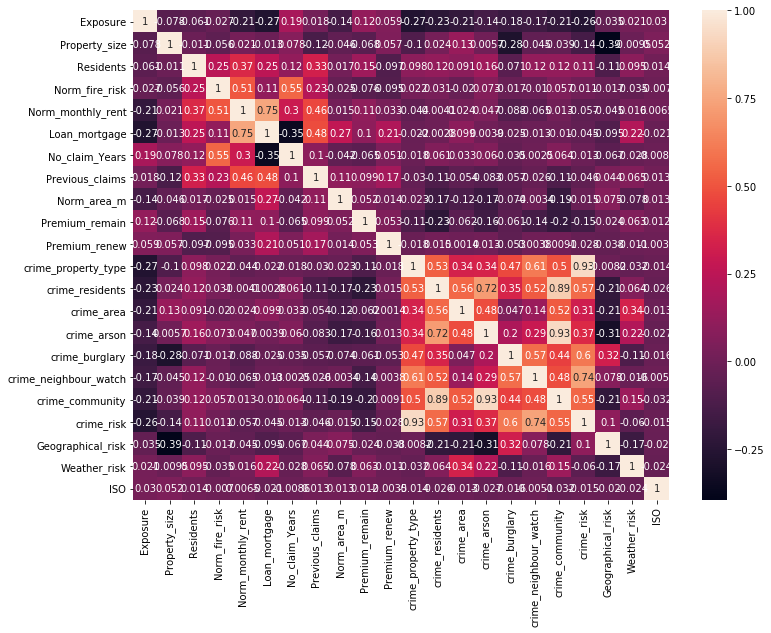

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize = (12, 9))
sns.heatmap(X.corr(), annot=True)

...we get a very high correlation between
- `crime_property_type` and `crime_risk`
- `crime_community` and `crime_residents`
- `crime_community` and `crime_arson`

Let's drop three of these:

In [13]:
numeric_features.remove('crime_risk')
numeric_features.remove('crime_residents')
numeric_features.remove('crime_arson')

In [14]:
numeric_features

['crime_burglary',
 'Norm_fire_risk',
 'ISO',
 'Weather_risk',
 'Geographical_risk',
 'Premium_remain',
 'crime_property_type',
 'crime_neighbour_watch',
 'Previous_claims',
 'Exposure',
 'crime_area',
 'Norm_monthly_rent',
 'No_claim_Years',
 'Norm_area_m',
 'Property_size',
 'Residents',
 'crime_community',
 'Loan_mortgage',
 'Premium_renew']

### 4. Do CV partitioning (keep 20% for holdout)

In [15]:
from sklearn.model_selection import train_test_split

# Ignore the features we dropped
XX = X[categorical_features] + X[numeric_features] + X[text_features]

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=0, shuffle=True)
y_train = y_train.values
y_test = y_test.values

In [16]:
X_train.shape

(973, 26)

In [17]:
X_test.shape

(244, 26)

In [18]:
y_train.shape

(973,)

In [19]:
y_test.shape

(244,)

### 5. Build a pipeline which can train the model

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Numeric preprocessing: simple imputation
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99999)),
])

# Categorical preprocessing: one-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OneHotEncoder(handle_unknown='ignore'))
])

# Text preprocessing: tf-idf
text_pipeline = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer())
])

# Preprocessing step
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
    ('text', categorical_pipeline, text_features)
])

# Final step: gradient boosting regressor 
est = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gbr', GradientBoostingRegressor(n_estimators=100))])

### 6. Optimize hyperparameters of models using GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator = est,
    param_grid = {
        'gbr__learning_rate': [0.01, 0.03, 0.1],
        'gbr__max_features': [0.1, 0.3, 1, 2, 4],
        'gbr__min_samples_leaf': [3, 4, 5],
        'gbr__min_samples_split': [8, 10, 12], 
    },
    scoring = 'neg_mean_absolute_error',
    cv = 3,
    refit = True
)

gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

### 7. Report score of model

In [22]:
from sklearn.metrics import mean_absolute_error

print("best params: {}".format(gs.best_params_))
print("model score: %.3f" % mean_absolute_error(y_test, gs.best_estimator_.predict(X_test)))

best params: {'gbr__learning_rate': 0.01, 'gbr__max_features': 0.1, 'gbr__min_samples_leaf': 3, 'gbr__min_samples_split': 8}
model score: 0.041
